<a href="https://colab.research.google.com/github/esraa9322/CNN/blob/main/SupervisedAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tensorflow==2.7.0

In [ ]:
import tensorflow as tf
from keras.datasets import mnist 
from matplotlib import pyplot as plt

In [ ]:
(train_X, train_labels), (test_X, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_X.shape

(60000, 28, 28)

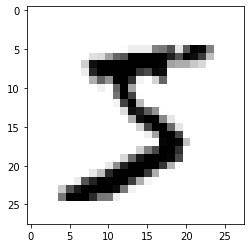

In [ ]:
plt.imshow(train_X[0],cmap = plt.cm.binary)

In [ ]:
train_X = train_X / 255.0
test_X = test_X / 255.0


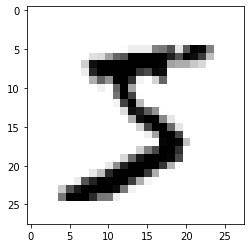

In [ ]:
plt.imshow(train_X[0],cmap = plt.cm.binary)

In [ ]:
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(train_labels[0])

5


In [ ]:
import numpy as np
train_X = np.array(train_X).reshape(-1,28,28,1)
test_X = np.array(test_X).reshape(-1,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,Softmax

THE INITAIL MODEL 2 CNN LAYERS , 2 FC LAYERS , SGD **bold text**



In [ ]:
from tensorflow.python.keras.activations import softmax
from tensorflow.python.keras.backend import conv2d
model1 =Sequential()
#first convolution layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
from tensorflow.keras.optimizers import SGD 
sgd = SGD(learning_rate=0.001, momentum=0.0)

In [ ]:
model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model1.fit(train_X, train_labels, epochs=10, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 16s 4ms/step - loss: 2.1509 - accuracy: 0.3941 - val_loss: 1.7631 - val_accuracy: 0.7074
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9498 - accuracy: 0.7906 - val_loss: 0.5131 - val_accuracy: 0.8688
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4294 - accuracy: 0.8808 - val_loss: 0.3451 - val_accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3248 - accuracy: 0.9079 - val_loss: 0.2746 - val_accuracy: 0.9217
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2718 - accuracy: 0.9218 - val_loss: 0.2330 - val_accuracy: 0.9329
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2368 - accuracy: 0.9319 - val_loss: 0.2035 - val_accuracy: 0.9417
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2111 - accuracy: 0.9390 - val_loss: 0.1850 - val_accuracy

In [ ]:
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.1583 - accuracy: 0.9540


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
#############model2
model1 =Sequential()
#first convolution layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.001, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model1.fit(train_X, train_labels, epochs=25, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32)
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)




Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 2.0716 - accuracy: 0.4557 - val_loss: 1.4673 - val_accuracy: 0.7564
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7506 - accuracy: 0.8267 - val_loss: 0.4291 - val_accuracy: 0.8834
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3755 - accuracy: 0.8927 - val_loss: 0.3154 - val_accuracy: 0.9091
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3016 - accuracy: 0.9117 - val_loss: 0.2641 - val_accuracy: 0.9248
Epoch 5/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2623 - accuracy: 0.9231 - val_loss: 0.2322 - val_accuracy: 0.9323
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2340 - accuracy: 0.9300 - val_loss: 0.2097 - val_accuracy: 0.9386
Epoch 7/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2117 - accuracy: 0.9375 - val_loss: 0.1925 - val_ac

In [ ]:
model1.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
import keras 
import time
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [ ]:
from keras import callbacks

In [ ]:
model1 =Sequential()
#first convolution layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.001, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 13s 7ms/step - loss: 1.9742 - accuracy: 0.4747 - val_loss: 1.2076 - val_accuracy: 0.7127
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7109 - accuracy: 0.8074 - val_loss: 0.4496 - val_accuracy: 0.8745
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4003 - accuracy: 0.8854 - val_loss: 0.3318 - val_accuracy: 0.9051
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3158 - accuracy: 0.9082 - val_loss: 0.2719 - val_accuracy: 0.9229
Epoch 5/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2705 - accuracy: 0.9207 - val_loss: 0.2422 - val_accuracy: 0.9303
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2394 - accuracy: 0.9291 - val_loss: 0.2093 - val_accuracy: 0.9396
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2158 - accuracy: 0.9369 - val_loss: 0.1879 - val_ac

In [ ]:
model1.summary()
print(times)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

TESTING LEARNING RATES

In [ ]:
model1 =Sequential()
# testing learning rate = 0.01
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5620 - accuracy: 0.8344 - val_loss: 0.1737 - val_accuracy: 0.9492
Epoch 2/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1492 - accuracy: 0.9554 - val_loss: 0.1009 - val_accuracy: 0.9699
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.0723 - val_accuracy: 0.9765
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0827 - accuracy: 0.9742 - val_loss: 0.0676 - val_accuracy: 0.9791
Epoch 5/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0528 - val_accuracy: 0.9831
Epoch 6/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0615 - accuracy: 0.9814 - val_loss: 0.0508 - val_accuracy: 0.9828
Epoch 7/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0552 - accuracy: 0.9833 - val_loss: 0.0465 - val_ac

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1779 - accuracy: 0.9438 - val_loss: 0.0575 - val_accuracy: 0.9803
Epoch 2/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0553 - accuracy: 0.9830 - val_loss: 0.0391 - val_accuracy: 0.9871
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0394 - val_accuracy: 0.9864
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0296 - accuracy: 0.9911 - val_loss: 0.0359 - val_accuracy: 0.9883
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0302 - val_accuracy: 0.9907
Epoch 6/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.0299 - val_accuracy: 0.9907
Epoch 7/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0306 - val_ac

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.003
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.003, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 1.1887 - accuracy: 0.6259 - val_loss: 0.3600 - val_accuracy: 0.8965
Epoch 2/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3083 - accuracy: 0.9075 - val_loss: 0.2367 - val_accuracy: 0.9315
Epoch 3/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2218 - accuracy: 0.9345 - val_loss: 0.1715 - val_accuracy: 0.9505
Epoch 4/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1720 - accuracy: 0.9491 - val_loss: 0.1393 - val_accuracy: 0.9578
Epoch 5/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1413 - accuracy: 0.9584 - val_loss: 0.1137 - val_accuracy: 0.9679
Epoch 6/40
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1220 - accuracy: 0.9641 - val_loss: 0.1031 - val_accuracy: 0.9693
Epoch 7/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1073 - accuracy: 0.9677 - val_loss: 0.1018 - val_ac

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.005
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.005, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7580 - accuracy: 0.7807 - val_loss: 0.3076 - val_accuracy: 0.9096
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2151 - accuracy: 0.9357 - val_loss: 0.1513 - val_accuracy: 0.9544
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1489 - accuracy: 0.9556 - val_loss: 0.1075 - val_accuracy: 0.9667
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1177 - accuracy: 0.9650 - val_loss: 0.0930 - val_accuracy: 0.9723
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0997 - accuracy: 0.9708 - val_loss: 0.0787 - val_accuracy: 0.9759
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.0687 - val_accuracy: 0.9785
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9760 - val_loss: 0.0694 - val_accuracy:

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1600)              0         
                                                                 
 dense_51 (Dense)            (None, 64)              

TESTING DIFFERNT ARCHITECTURES

we will use 40 epoches with 0.1 learning rate

In [ ]:
#1CNN AND 1 FC
model1 =Sequential()
# testing learning rate = 0.1
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())

model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2722 - accuracy: 0.9195 - val_loss: 0.1197 - val_accuracy: 0.9660
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0975 - accuracy: 0.9725 - val_loss: 0.0758 - val_accuracy: 0.9757
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0733 - accuracy: 0.9784 - val_loss: 0.0609 - val_accuracy: 0.9810
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0611 - accuracy: 0.9822 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0536 - accuracy: 0.9838 - val_loss: 0.0590 - val_accuracy: 0.9806
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0518 - val_accuracy: 0.9824
Epoch 7/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9873 - val_loss: 0.0659 - val_accuracy:

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_12 (Dense)            (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9845
[8.484246253967285, 7.41653

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2088 - accuracy: 0.9340 - val_loss: 0.0618 - val_accuracy: 0.9802
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0420 - val_accuracy: 0.9871
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.0343 - val_accuracy: 0.9895
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0295 - accuracy: 0.9906 - val_loss: 0.0355 - val_accuracy: 0.9886
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0297 - val_accuracy: 0.9898
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.0315 - val_accuracy: 0.9915
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0317 - val_accuracy:

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 , trying 3CNN and 3FC
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3402 - accuracy: 0.8899 - val_loss: 0.0895 - val_accuracy: 0.9743
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9813 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0488 - val_accuracy: 0.9859
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0828 - val_accuracy:

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 1, 32)        

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 , trying 3CNN and 2FC
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 32 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3089 - accuracy: 0.9020 - val_loss: 0.1018 - val_accuracy: 0.9687
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.0607 - val_accuracy: 0.9811
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0614 - accuracy: 0.9814 - val_loss: 0.0586 - val_accuracy: 0.9834
Epoch 4/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0603 - val_accuracy: 0.9841
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0414 - accuracy: 0.9872 - val_loss: 0.0607 - val_accuracy: 0.9832
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0651 - val_accuracy: 0.9799
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0489 - val_accuracy:

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 1, 1, 32)        

TRYING DIFFERENT BATCH SIZE 

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.2903 - accuracy: 0.9075 - val_loss: 0.0708 - val_accuracy: 0.9785
Epoch 2/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.0447 - val_accuracy: 0.9858
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0413 - val_accuracy: 0.9865
Epoch 4/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0328 - val_accuracy: 0.9885
Epoch 5/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0310 - val_accuracy: 0.9886
Epoch 6/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0382 - val_accuracy: 0.9879
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 96
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 96 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
625/625 [==============================] - 3s 4ms/step - loss: 0.3860 - accuracy: 0.8763 - val_loss: 0.1010 - val_accuracy: 0.9678
Epoch 2/40
625/625 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.0884 - val_accuracy: 0.9701
Epoch 3/40
625/625 [==============================] - 3s 4ms/step - loss: 0.0609 - accuracy: 0.9807 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 4/40
625/625 [==============================] - 2s 4ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.0449 - val_accuracy: 0.9850
Epoch 5/40
625/625 [==============================] - 2s 3ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0329 - val_accuracy: 0.9894
Epoch 6/40
625/625 [==============================] - 2s 4ms/step - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0473 - val_accuracy: 0.9849
Epoch 7/40
625/625 [==============================] - 2s 4ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 64)               

WE WILL GO WITH BATCH SIZE = 64 

WE WILL TEST 3 ACTIVATION FUNCTIONS

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , activation function will be sigmoid 
model1.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='sigmoid'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='sigmoid'))
model1.add(Dense(32, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 2.3064 - accuracy: 0.1068 - val_loss: 2.3096 - val_accuracy: 0.1028
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 2.3038 - accuracy: 0.1078 - val_loss: 2.3020 - val_accuracy: 0.1135
Epoch 3/40
938/938 [==============================] - 3s 4ms/step - loss: 2.3020 - accuracy: 0.1124 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 4/40
938/938 [==============================] - 4s 4ms/step - loss: 2.2940 - accuracy: 0.1297 - val_loss: 2.2776 - val_accuracy: 0.2497
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 1.7290 - accuracy: 0.4425 - val_loss: 0.9315 - val_accuracy: 0.7372
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.6303 - accuracy: 0.8290 - val_loss: 0.4413 - val_accuracy: 0.8789
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3635 - accuracy: 0.8970 - val_loss: 0.2925 - val_accuracy: 0.9162
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , activation function will be tanh
model1.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='tanh'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='tanh'))
model1.add(Dense(32, activation='tanh'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.2344 - accuracy: 0.9365 - val_loss: 0.0736 - val_accuracy: 0.9785
Epoch 2/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0673 - accuracy: 0.9805 - val_loss: 0.0517 - val_accuracy: 0.9852
Epoch 3/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0467 - accuracy: 0.9862 - val_loss: 0.0413 - val_accuracy: 0.9868
Epoch 4/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0374 - val_accuracy: 0.9877
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0278 - accuracy: 0.9920 - val_loss: 0.0365 - val_accuracy: 0.9891
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0224 - accuracy: 0.9938 - val_loss: 0.0330 - val_accuracy: 0.9892
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.0310 - val_accuracy: 0.9895
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 64)               

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , activation function will be softplus
model1.add(Conv2D(32, (3, 3), activation='softplus', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='softplus'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='softplus'))
model1.add(Dense(32, activation='softplus'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= sgd,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 2.0021 - accuracy: 0.2448 - val_loss: 0.5331 - val_accuracy: 0.8260
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.1802 - accuracy: 0.9446 - val_loss: 0.1132 - val_accuracy: 0.9635
Epoch 3/40
938/938 [==============================] - 3s 4ms/step - loss: 0.1028 - accuracy: 0.9694 - val_loss: 0.0788 - val_accuracy: 0.9753
Epoch 4/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0729 - accuracy: 0.9773 - val_loss: 0.0977 - val_accuracy: 0.9674
Epoch 5/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0748 - val_accuracy: 0.9755
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0698 - val_accuracy: 0.9794
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)
print(times)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_27 (Dense)            (None, 64)              

we will keep working with relu

WE WILL TRY 2 OPTIMIZERS 

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu , adam optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))



model1.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 6s 6ms/step - loss: 0.2007 - accuracy: 0.9396 - val_loss: 0.0568 - val_accuracy: 0.9834
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 4/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0353 - val_accuracy: 0.9869
Epoch 5/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0359 - val_accuracy: 0.9891
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0357 - val_accuracy: 0.9887
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0326 - val_accuracy: 0.9903
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [ ]:

model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu ,  Adadelta optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= 'adadelta',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 5s 4ms/step - loss: 2.2913 - accuracy: 0.1049 - val_loss: 2.2710 - val_accuracy: 0.1155
Epoch 2/40
938/938 [==============================] - 3s 4ms/step - loss: 2.2543 - accuracy: 0.1389 - val_loss: 2.2356 - val_accuracy: 0.1570
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 2.2156 - accuracy: 0.1815 - val_loss: 2.1923 - val_accuracy: 0.2108
Epoch 4/40
938/938 [==============================] - 4s 4ms/step - loss: 2.1684 - accuracy: 0.2344 - val_loss: 2.1422 - val_accuracy: 0.2428
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 2.1142 - accuracy: 0.2675 - val_loss: 2.0842 - val_accuracy: 0.2810
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 2.0521 - accuracy: 0.3085 - val_loss: 2.0179 - val_accuracy: 0.3258
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 1.9814 - accuracy: 0.3532 - val_loss: 1.9427 - val_accuracy: 0.3788
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1600)              0         
                                                                 
 dense_33 (Dense)            (None, 64)              

DROPOUT AT 2 DIFFERENT PLACES AND 2 DIFFERENT DROPOUTS


In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu , adam optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Dropout(rate=0.50))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 5s 4ms/step - loss: 0.2405 - accuracy: 0.9226 - val_loss: 0.0554 - val_accuracy: 0.9815
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0785 - accuracy: 0.9753 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0591 - accuracy: 0.9816 - val_loss: 0.0320 - val_accuracy: 0.9906
Epoch 4/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0400 - val_accuracy: 0.9870
Epoch 5/40
938/938 [==============================] - 4s 5ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.0266 - val_accuracy: 0.9919
Epoch 6/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0391 - accuracy: 0.9880 - val_loss: 0.0263 - val_accuracy: 0.9901
Epoch 7/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0312 - val_accuracy: 0.9897
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten_13 (Flatten)        (None, 1600)            

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu , adam optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Dropout(rate=0.75))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3317 - accuracy: 0.8931 - val_loss: 0.0656 - val_accuracy: 0.9787
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.1210 - accuracy: 0.9621 - val_loss: 0.0435 - val_accuracy: 0.9851
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0978 - accuracy: 0.9685 - val_loss: 0.0365 - val_accuracy: 0.9878
Epoch 4/40
938/938 [==============================] - 4s 5ms/step - loss: 0.0860 - accuracy: 0.9727 - val_loss: 0.0362 - val_accuracy: 0.9883
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0767 - accuracy: 0.9761 - val_loss: 0.0287 - val_accuracy: 0.9898
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0706 - accuracy: 0.9776 - val_loss: 0.0273 - val_accuracy: 0.9909
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0656 - accuracy: 0.9792 - val_loss: 0.0265 - val_accuracy: 0.9914
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_14 (Flatten)        (None, 1600)            

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu , adam optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))


model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(rate=0.50))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.4237 - accuracy: 0.8655 - val_loss: 0.0852 - val_accuracy: 0.9748
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.1511 - accuracy: 0.9539 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.1133 - accuracy: 0.9643 - val_loss: 0.0456 - val_accuracy: 0.9882
Epoch 4/40
938/938 [==============================] - 5s 6ms/step - loss: 0.0936 - accuracy: 0.9713 - val_loss: 0.0416 - val_accuracy: 0.9882
Epoch 5/40
938/938 [==============================] - 5s 5ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.0365 - val_accuracy: 0.9902
Epoch 6/40
938/938 [==============================] - 3s 4ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0444 - val_accuracy: 0.9901
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.0626 - accuracy: 0.9805 - val_loss: 0.0443 - val_accuracy: 0.9900
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1600)              0         
                                                                 
 dense_45 (Dense)            (None, 64)              

In [ ]:
model1 =Sequential()
# testing learning rate = 0.1 
# 2 CNN and 3 FC
# batch size = 64 , # activation function = relu , adam optimizer 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2),strides=(2,2)))


model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(rate=0.75))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(learning_rate=0.1, momentum=0.0)

model1.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

time_callback = TimeHistory() 
history = model1.fit(train_X, train_labels, epochs=40, 
                    validation_data=(test_X, test_labels),shuffle = True,batch_size = 64 , callbacks =[time_callback,earlystopping])
times = time_callback.times
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

Epoch 1/40
938/938 [==============================] - 4s 4ms/step - loss: 0.9102 - accuracy: 0.6470 - val_loss: 0.0890 - val_accuracy: 0.9738
Epoch 2/40
938/938 [==============================] - 4s 4ms/step - loss: 0.5334 - accuracy: 0.7872 - val_loss: 0.0596 - val_accuracy: 0.9835
Epoch 3/40
938/938 [==============================] - 4s 4ms/step - loss: 0.4645 - accuracy: 0.8153 - val_loss: 0.0599 - val_accuracy: 0.9843
Epoch 4/40
938/938 [==============================] - 3s 4ms/step - loss: 0.4356 - accuracy: 0.8252 - val_loss: 0.0541 - val_accuracy: 0.9873
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 0.4167 - accuracy: 0.8298 - val_loss: 0.0526 - val_accuracy: 0.9873
Epoch 6/40
938/938 [==============================] - 4s 4ms/step - loss: 0.4077 - accuracy: 0.8355 - val_loss: 0.0635 - val_accuracy: 0.9865
Epoch 7/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3887 - accuracy: 0.8403 - val_loss: 0.0577 - val_accuracy: 0.9889
Epoch 

In [ ]:
model1.summary()
test_loss, test_acc = model1.evaluate(test_X,  test_labels, verbose=1)

print(times)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 1600)              0         
                                                                 
 dense_48 (Dense)            (None, 64)              